# Quantum Hardware design ref.
This file always stays the same and will be used in all designs for "presim" all we do is just change variables to suit our specific circuit

## Quantum Harmonic Oscillator

In [59]:
import qiskit_metal as metal
import matplotlib.pyplot as plt
import numpy as np
import math

In [60]:
from qiskit_metal.analyses.hamiltonian.HO_wavefunctions import wavefunction

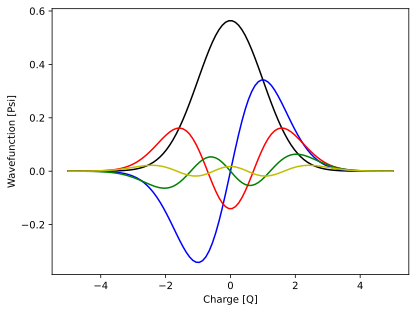

In [61]:
# Let's define the range of x-axis values (representating charge) to be from (-5,5)
x = np.linspace(-5,5,100)

# Let's plot the first five energy levels (N=0 through N=4) of the harmonic oscillator
# We'll just take L=C=1.0 for simplicity
plt.plot(x, wavefunction(1, 1, 0, x), 'k') # N=0; ground state (black)
plt.plot(x, wavefunction(1, 1, 1, x), 'b') # N=1; first excited state (blue)
plt.plot(x, wavefunction(1, 1, 2, x), 'r') # N=2; second excited state (red)
plt.plot(x, wavefunction(1, 1, 3, x), 'g') # N=3; third excited state (green)
plt.plot(x, wavefunction(1, 1, 4, x), 'y') # N=4; fourth excited state (yellow)
plt.xlabel("Charge [Q]")
plt.ylabel("Wavefunction [Psi]")

# show the plot
plt.show()

## Plotting Eigenvalues as a Function

In [46]:
from qiskit_metal.analyses.hamiltonian.transmon_charge_basis import Hcpb
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# We'll use the variable x to represent the offset charge (ng), which will vary from -2.0 to 2.0
x = np.linspace(-2.0,2.0,101)

In [48]:
# Define a value of the Josephson Energy (E_J) as well as the ratio between the E_J and the Charging Energy (E_C):
E_J = 1000.0
ratio = 1.0
E_C = E_J/ratio

In [49]:
# we'll normalize the calculated energies by the 0->1 transition state energy evaluated at the degenercy point (ng=0.5)
H_norm = Hcpb(nlevels=2, Ej=E_J, Ec=E_C, ng=0.5)
norm = H_norm.fij(0,1)

# Next we'll empty lists to the first three eigenvalues (m=0, m=1, m=2):
E0 = []
E1 = []
E2 = []

# For a given value of offset charge (ng, represented by x) we will calculate the CPB Hamiltonian using the previously assigned values of E_J and E_C. Then we calculate the eigenvalue for a given value of m.
for i in x:
    H = Hcpb(nlevels=3, Ej=E_J, Ec=E_C, ng=i)
    E0.append(H.evalue_k(0)/norm)
    E1.append(H.evalue_k(1)/norm)
    E2.append(H.evalue_k(2)/norm)

# define the minimum of E0 and set this to E=0
floor = min(E0)

plt.plot(x, E0 - floor, 'k')
plt.plot(x, E1 - floor, 'r')
plt.plot(x, E2 - floor, 'b')
plt.xlabel("ng")
plt.ylabel("Em/E01")

Text(38.902777777777786, 0.5, 'Em/E01')

## Energy levels

In [56]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy = True
%matplotlib inline
%config Completer.use_jedi = False
%config InlineBackend.figure_format = 'svg'

from qiskit_metal.analyses.hamiltonian.transmon_charge_basis import Hcpb
from qiskit_metal.analyses.hamiltonian.transmon_CPB_analytic import Hcpb_analytic
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
x = np.linspace(-2.0,2.0,101) # this represents the charging energy (ng)
H_norm = Hcpb(nlevels=2, Ej=1000.0, Ec=1000.0, ng=0.5) # Hamiltonian definition
norm = H_norm.fij(0,1) # normalization constant

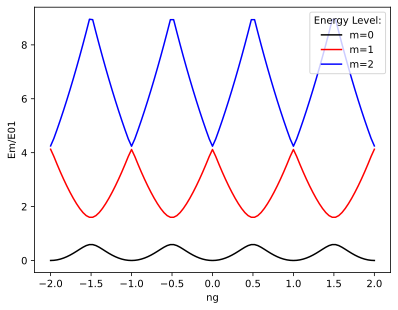

In [58]:
E0, E1, E2 = [], [], []

# For a given value of offset charge (ng, represented by x) we will calculate the CPB Hamiltonian using the previously assigned values of E_J and E_C. Then we calculate the eigenvalue for a given value of m.
for i in x:
    H = Hcpb(nlevels=3, Ej=1000.0, Ec=1000.0, ng=i)
    E0.append(H.evalue_k(0)/norm)
    E1.append(H.evalue_k(1)/norm)
    E2.append(H.evalue_k(2)/norm)

# define the minimum of E0 and set this to E=0
floor = min(E0)

plt.plot(x, E0 - floor, 'k', label="m=0")
plt.plot(x, E1 - floor, 'r', label="m=1")
plt.plot(x, E2 - floor, 'b', label="m=2")
plt.xlabel("ng")
plt.ylabel("Em/E01")
plt.legend(title="Energy Level:", loc='upper right')

## Wavefunction

In [53]:
H = Hcpb(nlevels=3, Ej=13971.3, Ec=295.2, ng=0.001)
print(f"""
Transmon frequencies

 ω01/2π = {H.fij(0,1): 6.0f} MHz
   α/2π = {H.anharm(): 6.0f} MHz
""")


Transmon frequencies

 ω01/2π =   5604 MHz
   α/2π =     11 MHz



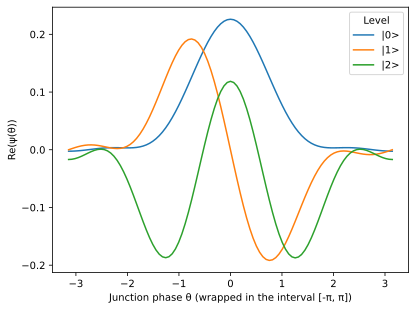

In [54]:
import matplotlib.pyplot as plt
for k in range (3):
    ψ, θ = H.psi_k(k,101)
    plt.plot(θ, ψ.real+ψ.imag, label=f"|{k}>") # it's in either quadrature, but not both
plt.xlabel("Junction phase θ (wrapped in the interval [-π, π])")
plt.ylabel("Re(ψ(θ))")
plt.legend(title="Level")

In [55]:
Psi0, theta0 = H.psi_k(0)
Psi1, theta1 = H.psi_k(1)
print(np.dot(Psi0,Psi1.conj()))

(-2.2354805729522635e-09+1.7634461200402775e-17j)


In [41]:
print(np.dot(Psi0, Psi0.conj()))
print(np.dot(Psi1, Psi1.conj()))

(0.9999999999999998+0j)
(1+0j)


## Decoherence time T2 

In [62]:
x = np.linspace(0,80,101)     # ratio of Ej/Ec, varying from 0 to 80
T2 = []                       # empty list for T2

Text(0, 0.5, 'T2 (sec)')

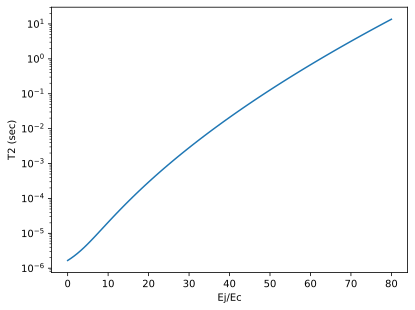

In [63]:
E_c = 1000.0
for i in x:
    H_half = Hcpb(nlevels=15, Ej=i*E_c, Ec=E_c, ng=0.5)
    H_zero = Hcpb(nlevels=15, Ej=i*E_c, Ec=E_c, ng=0.0)
    eps = abs(H_half.evalue_k(1) - H_zero.evalue_k(1))
    T2.append(1.0/(2.0*(1E-4)*(1E6)*eps) )

plt.plot(x, T2)
plt.yscale("log")
plt.xlabel("Ej/Ec")
plt.ylabel("T2 (sec)")